In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Linear Algebra 3

### Two Perspectives on `Matrix @ vector`

$\begin{bmatrix}
4&5\\6&7\\8&9\\
\end{bmatrix}
\cdot
\begin{bmatrix}
2\\3\\
\end{bmatrix}
= ????
$

In [2]:
X = np.array([[4, 5], [6, 7], [8, 9]])
c = np.array([2, 3]).reshape(-1, 1)
X @ c

array([[23],
       [33],
       [43]])

### Row Picture

Do matrix multiplication one row at a time.

$\begin{bmatrix}
4&5\\6&7\\8&9\\
\end{bmatrix}
\cdot
\begin{bmatrix}
2\\3\\
\end{bmatrix}
=
\begin{bmatrix}
(4*2)+(5*3)\\
(6*2)+(7*3)\\
(8*2)+(9*3)\\
\end{bmatrix}
=
\begin{bmatrix}
23\\
33\\
43\\
\end{bmatrix}
$

In [3]:
def matrix_multi_by_row(X, c):
    """
    function that performs same action as @ operator
    """
    result = []
    # loop over each row index of X
    for row_idx in range(X.shape[0]):
        # extract each row using slicing
        # why slicing? we want two dimensional array
        row = X[row_idx:row_idx+1, :]
        # multiply the row with c
        result.append((row @ c).item())
    # convert result into a vertical numpy array
    return np.array(result).reshape(-1, 1)
    
matrix_multi_by_row(X, c)

array([[23],
       [33],
       [43]])

In [4]:
X.shape

(3, 2)

### Column Picture

$\begin{bmatrix}
c_0&c_1&c_2\\
\end{bmatrix}
\cdot
\begin{bmatrix}
x\\y\\z\\
\end{bmatrix}
=(c_0*x) + (c_1*y) + (c_2*z)
$

matrix multiplication takes a **linear combination** of columns.

$\begin{bmatrix}
4&5\\6&7\\8&9\\
\end{bmatrix}
\cdot
\begin{bmatrix}
2\\3\\
\end{bmatrix}
=
\begin{bmatrix}
4\\6\\8\\
\end{bmatrix}*2
+
\begin{bmatrix}
5\\7\\9\\
\end{bmatrix}*3
=
\begin{bmatrix}
23\\
33\\
43\\
\end{bmatrix}
$

In [5]:
def matrix_multi_by_col(X, c):
    """
    same result as matrix_multi_by_row above, 
    but different approach
    """
    # initialize a vertical vector of zeros
    total = np.zeros(X.shape[0]).reshape(-1, 1)
    # loop over each col index of X
    for col_idx in range(X.shape[1]):
        # extract each column using slicing
        col = X[:, col_idx:col_idx+1]
        # extract weight for the column using indexing
        weight = c[col_idx, 0]
        # add weighted column to total
        total += col * weight
    return total
    
matrix_multi_by_col(X, c)

array([[23.],
       [33.],
       [43.]])

In [6]:
X.shape

(3, 2)

In [7]:
# Create a vertical vector / array containing 3 0's
np.zeros(3).reshape(-1, 1)

array([[0.],
       [0.],
       [0.]])

### Part 1: Column Space of a Matrix

Definition: the *column space* of a matrix is the set of all linear combinations of that matrix's columns.

In [8]:
A = np.array([
    [1, 100],
    [2, 10],
    [3, 0]
])
B = np.array([
    [1, 0],
    [0, 2],
    [0, 3],
    [0, 0]
])

$A = \begin{bmatrix}
1&100\\
2&10\\
3&0\\
\end{bmatrix}$

In [9]:
# this is in the column space of A (it's a weighted mix of the columns)
A @ np.array([1, 1]).reshape(-1, 1)

array([[101],
       [ 12],
       [  3]])

In [10]:
# this is in the column space of A (it's a weighted mix of the columns)
A @ np.array([-1, 0]).reshape(-1, 1)

array([[-1],
       [-2],
       [-3]])

In [11]:
# this is in the column space of A (it's a weighted mix of the columns)
A @ np.array([0, 2]).reshape(-1, 1)

array([[200],
       [ 20],
       [  0]])

In [12]:
# this is in the column space of A (it's a weighted mix of the columns)
A @ np.array([0, 0]).reshape(-1, 1)

array([[0],
       [0],
       [0]])

A right-sized zero vector will always be in the column space.

What vectors are in the column space of B?

$B = \begin{bmatrix}
1&0\\
0&2\\
0&3\\
0&0\\
\end{bmatrix}$

$a=\begin{bmatrix}
2\\
2\\
3\\
0
\end{bmatrix}, b=\begin{bmatrix}
0\\
0\\
0\\
1
\end{bmatrix}, c=\begin{bmatrix}
-10\\
0\\
0\\
0
\end{bmatrix}, d=\begin{bmatrix}
0\\
-2\\
3\\
0
\end{bmatrix}, e=\begin{bmatrix}
-1\\
2\\
3\\
0
\end{bmatrix}$

In [13]:
c = np.array([-1, 1]).reshape(-1, 1) # coef
B @ c

array([[-1],
       [ 2],
       [ 3],
       [ 0]])

### Solution
- in the column space of B: 
    - a [2, 1]
    - c [-10, 0]
    - e [-1, 1]
- not in the column space: 
    - b (no weighting of 0 and 0 can make a 1)
    - d (if you multiple 2 and 3 by the same constant, the sign will be the same)

### Part 2: When can we solve for c?

Suppose $Xc = y$.

$X$ and $y$ are known, and we want to solve for $c$.

When does `c = np.linalg.solve(X, y)` work?

#### Fruit Sales Example

##### Data

* `10 apples and 0 bananas sold for $7`
* `2 apples and 8 bananas sold for $5`
* `4 apples and 4 bananas sold for $5`

##### Equations

* `10*apple + basket = 7`
* `2*apple + 8*banana + basket = 5`
* `4*apple + 4*banana + basket = 5`

In [14]:
X = np.array([
    [10, 0, 1],
    [2, 8, 1],
    [4, 4, 1],
])
y = np.array([7, 5, 5]).reshape(-1, 1)

c = np.linalg.solve(X, y)
c

array([[0.5 ],
       [0.25],
       [2.  ]])

In [15]:
X = np.array([
    [10, 0, 1],
    [2, 8, 1],
    [4, 4, 1],
    # adding one more equation
    [4, 4, 1],
])
y = np.array([7, 5, 5, 6]).reshape(-1, 1) # mathematically unsolvable

c = np.linalg.solve(X, y)
c

LinAlgError: Last 2 dimensions of the array must be square

In [16]:
X

array([[10,  0,  1],
       [ 2,  8,  1],
       [ 4,  4,  1],
       [ 4,  4,  1]])

In [17]:
np.array([[ 4,  4,  1]]) @ c

array([[5.]])

In [18]:
np.array([[ 5,  5,  1]]) @ c

array([[5.75]])

#### There is a solution for $c$ (in $Xc = y$), even if `np.linalg.solve` can't find it.

- mathematically solvable

In [19]:
X = np.array([
    [10, 0, 1],
    [2, 8, 1],
    [4, 4, 1],
    # adding one more equation
    [5, 5, 1],
])
y = np.array([7, 5, 5, 5.75]).reshape(-1, 1)

c = np.linalg.solve(X, y)
c

LinAlgError: Last 2 dimensions of the array must be square

### Equivalent statements

* there is a solution for the system of equations and `np.linalg.solve` can find it
* there is a solution for $c$ (in $Xc = y$), even if `np.linalg.solve` can't find it
* $y$ is in the column space of $X$

### Problem with most tables

For a system of equations, same # of equations == # of variables usually means it's solvable.  

However, often cases, dataset has more rows than columns, which means more equations than variables.

This *usually* means that:

The equations aren't solvable, and y isn't in the column space of X.

In [20]:
X

array([[10,  0,  1],
       [ 2,  8,  1],
       [ 4,  4,  1],
       [ 5,  5,  1]])

In [21]:
y

array([[7.  ],
       [5.  ],
       [5.  ],
       [5.75]])

matrix multiplication both sides by `X.T` ---> this will usually make it solvable.

In [22]:
c = np.linalg.solve(X.T @ X, X.T @ y)
c

array([[0.5 ],
       [0.25],
       [2.  ]])

What is special about matrix multiplication of a matrix with its transpose? Resultant shape is always a square.

Why? Say X has the shape of (a, b), then X.T has the shape of (b, a). Then X.T @ X has the shape of (b, b).

In [23]:
(X.T @ X).shape

(3, 3)

### Part 3: Projection Matrix

Say X and y are known, but we can't solve for c because X has more rows than columns:

### <font color='red'>$Xc = y$</font>

We can, however, usually (unless there are multiple equally good solutions) solve the following, which we get by multiplying both sides by $X^T$:

### <font color='red'>$X^TXc = X^Ty$</font>

If we can find a c to make the above true, we can multiple both sides by $(X^TX)^{-1}$ (which generally exists unless X columns are redundant) to get this equation:

$(X^TX)^{-1}X^TXc = (X^TX)^{-1}X^Ty$

Simplify:

$c = (X^TX)^{-1}X^Ty$

Multiply both sides by X:

### <font color='red'>$Xc = X(X^TX)^{-1}X^Ty$</font>

### Note we started with an unsolveable $Xc = ????$ problem but multiplied $y$ by something to get a different $Xc = ????$ that is solveable.

Define <font color="red">$P = X(X^TX)^{-1}X^T$</font>.  This is a **projection matrix**.  If you multiply a vector $c$ by $P$, you get back another vector $c'$ of the same size, with two properties:

1. $c'$ will be in the column space of $X$
2. the new vector $c'$ will be as "close as possible" to the original vector

Note: computing P is generally very expensive.

### Fruit Sales Example

In [24]:
X = np.array([
    [10, 0, 1],
    [2, 8, 1],
    [4, 4, 1],
    [10, 4, 1],
    [10, 4, 1]
])
y = np.array([7, 5, 5, 8, 8.5]).reshape(-1, 1)
y

array([[7. ],
       [5. ],
       [5. ],
       [8. ],
       [8.5]])

Let's compute $P = X(X^TX)^{-1}X^T$.

- **IMPORTANT**: We are not going to discuss how inverse works. That is beyond the scope of CS320.

### `np.linalg.inv(a)`

- computes the (multiplicative) inverse of a matrix.
- documentation: https://numpy.org/doc/stable/reference/generated/numpy.linalg.inv.html

In [25]:
P = X @ np.linalg.inv(X.T @ X) @ X.T
P

array([[ 0.75      , -0.25      ,  0.33333333,  0.08333333,  0.08333333],
       [-0.25      ,  0.75      ,  0.33333333,  0.08333333,  0.08333333],
       [ 0.33333333,  0.33333333,  0.55555556, -0.11111111, -0.11111111],
       [ 0.08333333,  0.08333333, -0.11111111,  0.47222222,  0.47222222],
       [ 0.08333333,  0.08333333, -0.11111111,  0.47222222,  0.47222222]])

In [26]:
X

array([[10,  0,  1],
       [ 2,  8,  1],
       [ 4,  4,  1],
       [10,  4,  1],
       [10,  4,  1]])

In [27]:
y

array([[7. ],
       [5. ],
       [5. ],
       [8. ],
       [8.5]])

The new vector will be as "close as possible" to the original vector.

In [28]:
P @ y

array([[7.04166667],
       [5.04166667],
       [4.94444444],
       [8.23611111],
       [8.23611111]])

#### Scatter plot visualization

**IMPORTANT**: We are not going to discuss how `np.random.normal` works. You can look up the documentation if you are interested.

In [29]:
x = np.random.normal(5, 2, size=(10, 1))
y = 2*x + np.random.normal(size=x.shape)
df = pd.DataFrame({"x": x.reshape(-1), "y": y.reshape(-1)})
df

,x,y
0,5.212123,9.188802
1,6.156175,12.762356
2,2.581354,4.611898
3,4.322539,9.275279
4,5.807151,11.915659
5,0.515777,0.953510
6,6.585444,14.240592
7,6.739125,14.161582
8,4.816345,7.853881
9,6.536091,12.540690


<AxesSubplot:xlabel='x', ylabel='y'>

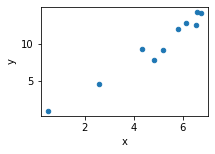

In [30]:
df.plot.scatter(x="x", y="y", figsize=(3, 2))

In [31]:
X = df[["x"]].values
X

array([[5.21212311],
       [6.15617456],
       [2.58135431],
       [4.32253914],
       [5.80715055],
       [0.51577694],
       [6.58544438],
       [6.73912548],
       [4.8163449 ],
       [6.5360911 ]])

In [32]:
P = X @ np.linalg.inv(X.T @ X) @ X.T
P

array([[0.09733405, 0.11496378, 0.04820563, 0.08072147, 0.10844592,
        0.0096319 , 0.1229802 , 0.12585013, 0.08994307, 0.12205855],
       [0.11496378, 0.13578672, 0.05693692, 0.09534223, 0.1280883 ,
        0.01137649, 0.14525513, 0.14864487, 0.1062341 , 0.14416654],
       [0.04820563, 0.05693692, 0.0238743 , 0.03997809, 0.05370889,
        0.00477029, 0.06090713, 0.06232849, 0.04454517, 0.06045068],
       [0.08072147, 0.09534223, 0.03997809, 0.06694426, 0.08993681,
        0.00798797, 0.10199044, 0.10437054, 0.07459195, 0.1012261 ],
       [0.10844592, 0.1280883 , 0.05370889, 0.08993681, 0.12082634,
        0.0107315 , 0.13701989, 0.14021746, 0.10021117, 0.13599303],
       [0.0096319 , 0.01137649, 0.00477029, 0.00798797, 0.0107315 ,
        0.00095315, 0.01216977, 0.01245377, 0.00890051, 0.01207857],
       [0.1229802 , 0.14525513, 0.06090713, 0.10199044, 0.13701989,
        0.01216977, 0.15538376, 0.15900987, 0.1136418 , 0.15421927],
       [0.12585013, 0.14864487, 0.0623284

In [33]:
df["p"] = P @ df[["y"]]
df

,x,y,p
0,5.212123,9.188802,10.404663
1,6.156175,12.762356,12.289219
2,2.581354,4.611898,5.153010
3,4.322539,9.275279,8.628837
4,5.807151,11.915659,11.592482
5,0.515777,0.953510,1.029616
6,6.585444,14.240592,13.146145
7,6.739125,14.161582,13.452930
8,4.816345,7.853881,9.614593
9,6.536091,12.540690,13.047624


<AxesSubplot:xlabel='x', ylabel='p'>

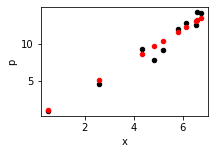

In [34]:
ax = df.plot.scatter(x="x", y="y", figsize=(3, 2), color="k")
df.plot.scatter(x="x", y="p", color="r", ax=ax)

### Euclidean Distance between columns

- how close is the new vector (`P @ y`) to the original vector (`y`)?
- $dist$ = $\sqrt{(x2 - x1)^2 + (y2 - y1)^2}$

In [35]:
coords = pd.DataFrame({
    "v1": [1, 8],
    "v2": [4, 12],
}, index=["x", "y"])
coords

,v1,v2
x,1,4
y,8,12


In [36]:
# distance between v1 and v2 is 5
((coords["v1"] - coords["v2"]) ** 2).sum() ** 0.5 

5.0

In [37]:
# this is the smallest possible distance between y and p, such
# that X @ c = p is solveable
((df["y"] - df["p"]) ** 2).sum() ** 0.5

2.753214863149775